In [ ]:
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk


In [15]:
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request#new
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures
import folium
from folium import plugins
import json
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [16]:
def GeoParse(url):
  response = request.urlopen(url)
  raw = response.read().decode('utf8')
  places = GeoText(raw)
  cities = list(places.cities)
  geolocator = Nominatim(user_agent='ankitmaheshwari130@gmail.com', timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.
  lat_lon = []
  for city in cities:
    try:
      location = geolocator.geocode(city)
      if location:
        # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
        lat_lon.append(location)
    except GeocoderTimedOut as e:
      print("Error: geocode failed on input %s with message %s">
            (city, e))
  df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
  geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
  crs = {'init': 'epsg:4326'}
  geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
  countries_map = gpd.read_file('Countries_WGS84.shp')
  f, ax = plt.subplots(figsize=(16, 16))
  countries_map.plot(ax=ax, alpha=0.4, color='grey')
  geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)
  freqdist1 = nltk.FreqDist(cities)
  freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20
  geo_df['geometry'].to_file("TwainCities.geojson", driver='GeoJSON')
  # initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
  TwainMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Terrain', zoom_start=2)

  folium.GeoJson("TwainCities.geojson").add_to(TwainMap)
  TwainMap

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


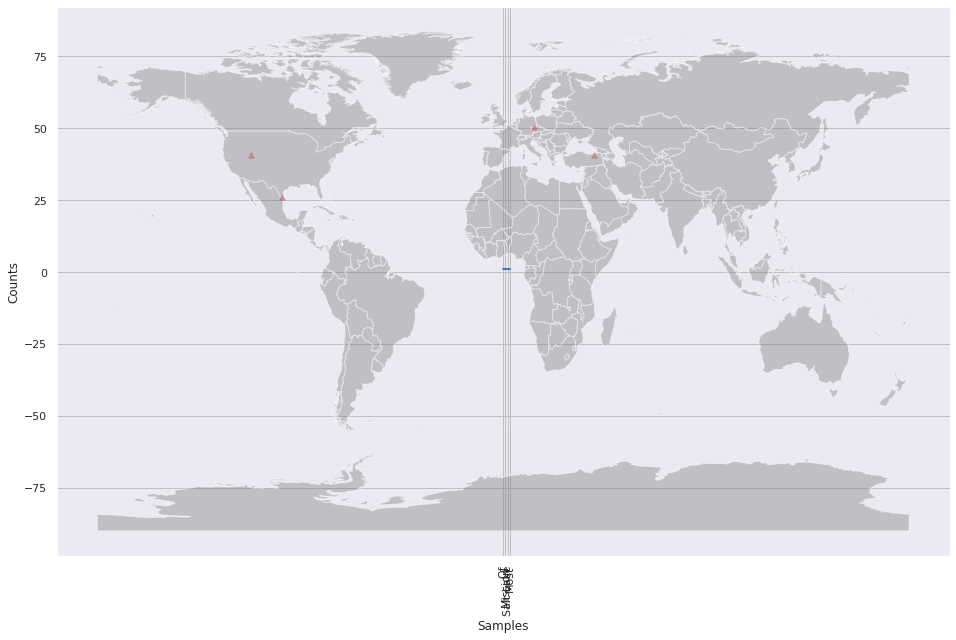

In [19]:
GeoParse('https://www.gutenberg.org/files/65451/65451-0.txt')